**Dataset Overview:**
* Size: The dataset comprises records of approximately 278,848 individuals who underwent testing for COVID-19.
* Columns and Features: The dataset includes 11 columns providing different attributes for each individual:

1. ID: Individual identification number.
2. Sex: Gender of the individual (male/female).
3. Age ≥ 60 Above: Boolean indicating whether the person is aged 60 or above (true/false).
4. Test Date: Date when the COVID-19 test was conducted.
* Symptoms:
1. Cough: Presence or absence of a cough (true/false).
2. Fever: Presence or absence of fever (true/false).
3. Sore Throat: Presence or absence of a sore throat (true/false).
4. Shortness of Breath: Presence or absence of breathing difficulty (true/false).
5. Headache: Presence or absence of a headache (true/false).
* Known Contact: Whether the individual had known contact with a confirmed COVID-19 case (true/false).
* COVID Result: The outcome variable indicating COVID test results (positive/negative).
* Date Range: The dataset covers records from March 11, 2020, to April 30, 2020, providing information collected over this period.
Training, Validation, and Test Set Divisions: The dataset will be split into three segments for model training, validation, and testing:

1. Training & Validation: Data from March 11 to April 15 will be used for training and validation. This range will further split into a 4:1 ratio for training and validation.
2. Test Set: Records from April 16 to April 30 will serve as the test set to evaluate the model's performance on unseen data.


In [ ]:
!pip install --upgrade ipython


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/corona_tested_006.csv')
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


Hypothesis:

1. Individuals aged 60 and above are more likely to test positive for COVID-19 compared to younger individuals.
2. Random Forest is going to predict corona virus better than Decision tree classifier






EDA

In [ ]:
df.shape

(278848, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
df.describe()

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


In [ ]:
df['Test_date'] = pd.to_datetime(df['Test_date'], format='%d-%m-%Y')

converted 'Test_date' column to datetime format

In [ ]:
columns_to_drop = ['Ind_ID', 'Known_contact']
df.drop(columns=columns_to_drop, inplace=True)

dropped  columns named 'Ind_ID' and 'Known_contact'

In [ ]:
for i in df:
  print(i, "i" ,df[i].unique())

Test_date i ['2020-03-11T00:00:00.000000000' '2020-03-12T00:00:00.000000000'
 '2020-03-13T00:00:00.000000000' '2020-03-14T00:00:00.000000000'
 '2020-03-15T00:00:00.000000000' '2020-03-16T00:00:00.000000000'
 '2020-03-17T00:00:00.000000000' '2020-03-18T00:00:00.000000000'
 '2020-03-19T00:00:00.000000000' '2020-03-20T00:00:00.000000000'
 '2020-03-21T00:00:00.000000000' '2020-03-22T00:00:00.000000000'
 '2020-03-23T00:00:00.000000000' '2020-03-24T00:00:00.000000000'
 '2020-03-25T00:00:00.000000000' '2020-03-26T00:00:00.000000000'
 '2020-03-27T00:00:00.000000000' '2020-03-28T00:00:00.000000000'
 '2020-03-29T00:00:00.000000000' '2020-03-30T00:00:00.000000000'
 '2020-03-31T00:00:00.000000000' '2020-04-01T00:00:00.000000000'
 '2020-04-02T00:00:00.000000000' '2020-04-03T00:00:00.000000000'
 '2020-04-04T00:00:00.000000000' '2020-04-05T00:00:00.000000000'
 '2020-04-06T00:00:00.000000000' '2020-04-07T00:00:00.000000000'
 '2020-04-08T00:00:00.000000000' '2020-04-09T00:00:00.000000000'
 '2020-04-10T

In [ ]:
symptoms = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']
df[symptoms] = df[symptoms].replace({'TRUE': True, 'True': True, 'FALSE': False, 'False': False, 'F':False, 'None':np.nan})


changed the representation of symptoms into boolean values (True/False) and NaN

In [ ]:
for col in symptoms:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

 filled missing values in the symptom columns with their respective mode values.

In [ ]:
for col in symptoms:
    df[col] = df[col].replace({True: 1, False: 0})

replaced True with 1 and False with 0 for symptoms

In [ ]:
categorical_cols = ['Corona', 'Age_60_above','Sex']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [ ]:
df['Corona'] = df['Corona'].replace({'other': np.nan})
df['Age_60_above'] = df['Age_60_above'].replace({'None': np.nan})
df['Sex']= df['Sex'].replace({'None': np.nan,})

In [ ]:
categorical_cols = ['Corona', 'Age_60_above', 'Sex']

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

Replaced occurrences of 'other' in the 'Corona' column, 'None' in the 'Age_60_above' column,'None' in the 'Sex' column  with NaN.

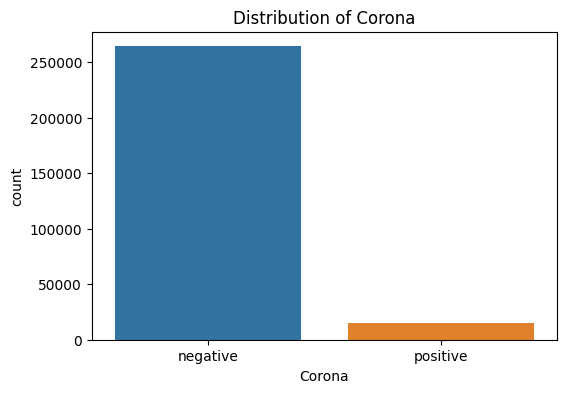

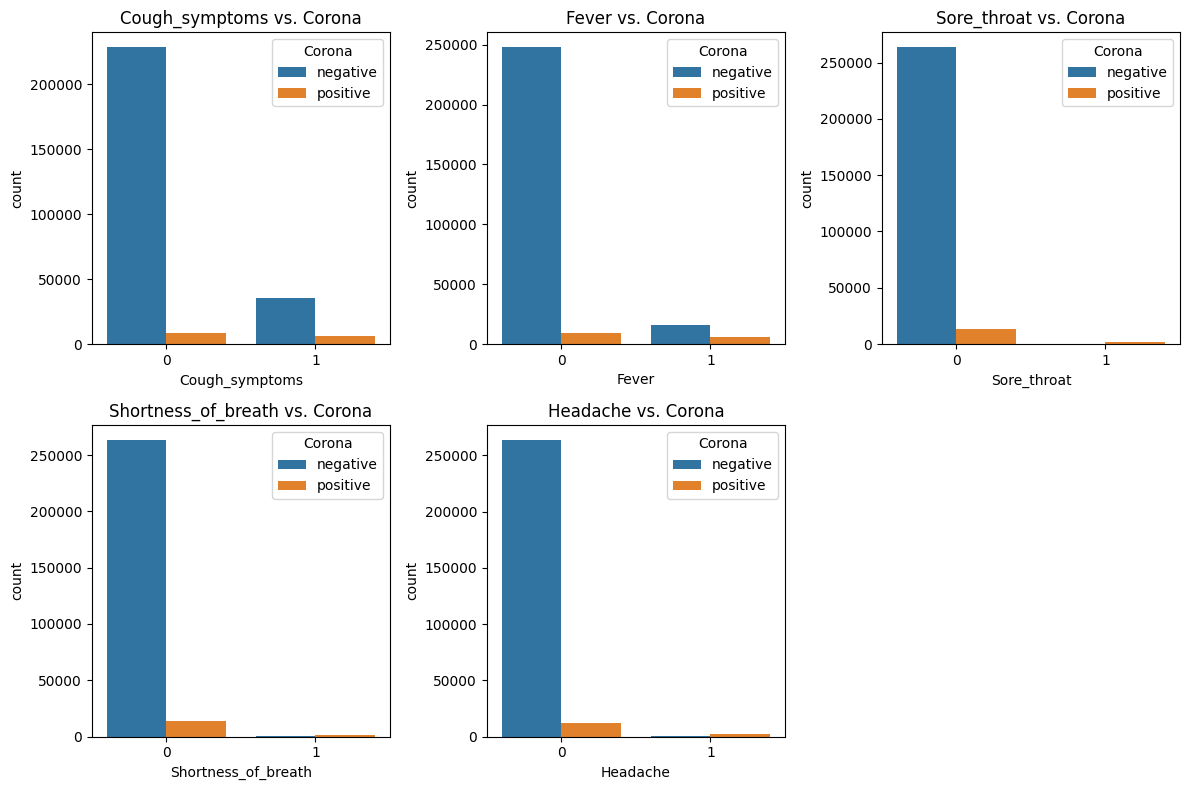

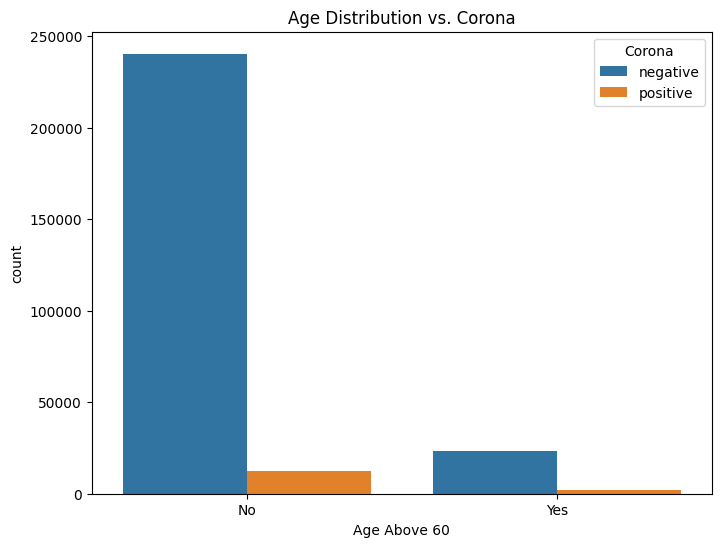

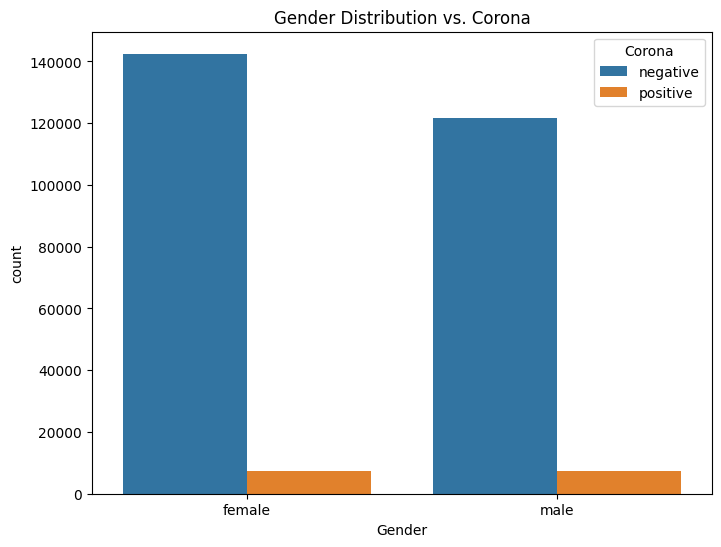

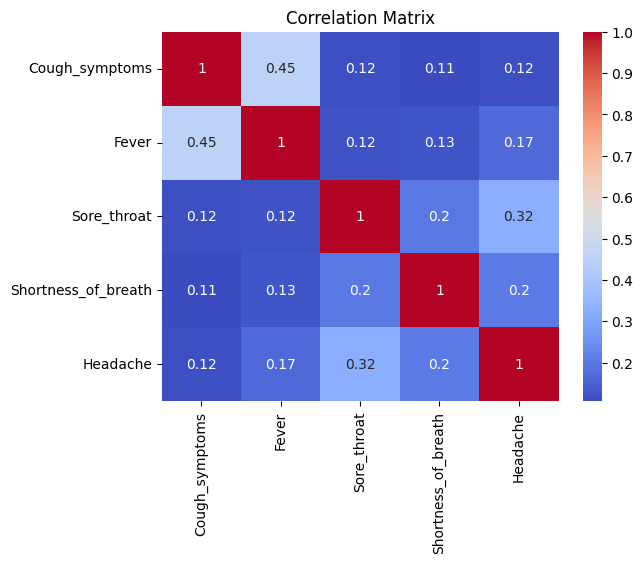

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Corona', data=df)
plt.title('Distribution of Corona')
plt.show()

symptoms = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']
plt.figure(figsize=(12, 8))
for i, symptom in enumerate(symptoms, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=symptom, hue='Corona', data=df)
    plt.title(f'{symptom} vs. Corona')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Age_60_above', hue='Corona', data=df)
plt.title('Age Distribution vs. Corona')
plt.xlabel('Age Above 60')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Corona', data=df)
plt.title('Gender Distribution vs. Corona')
plt.xlabel('Gender')
plt.show()


corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#sns.pairplot(df, hue='Corona')
#plt.show()



1.   The distribution of classes in 'Corona' ('positive' vs. 'negative') shows a significant class imbalance.
2.   I did an analysis of handling 'None' Category in 'Sex' Column Comparison:
and this was the output -

Without 'None' Category:

*   Accuracy: 0.9471238212777445
*   Precision: 0.9334618544720013
*   Recall: 0.9471238212777445

With 'None' Category Replaced by NaN:

*   Accuracy: 0.9450600681369912
*   Precision: 0.9295110922068016
*   Recall: 0.9450600681369912

the output implies that it doesn't influences the patterns, predictions, or insights derived from the model so i choose to proceed without focusing any change on this particular aspect.
3.   Ind_ID and Known_contact don't really have much to conribut in analysis of covid test





converting categorical columns into categorical data types

In [ ]:
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,2020-03-11,1,0,1,0,0,negative,No,female
1,2020-03-11,0,1,0,0,0,positive,No,female
2,2020-03-11,0,1,0,0,0,positive,No,female
3,2020-03-11,1,0,0,0,0,negative,No,female
4,2020-03-11,1,0,0,0,0,negative,No,female


In [ ]:
df['Sex'].fillna('missing', inplace=True)

df['Corona'] = df['Corona'].map({'negative': 0, 'positive': 1})
df['Age_60_above'] = df['Age_60_above'].map({'No': 0, 'Yes': 1})
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [ ]:
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
0,2020-03-11,1,0,1,0,0,0,0,1
1,2020-03-11,0,1,0,0,0,1,0,1
2,2020-03-11,0,1,0,0,0,1,0,1
3,2020-03-11,1,0,0,0,0,0,0,1
4,2020-03-11,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
train_val_mask = (df['Test_date'] >= '2020-03-11') & (df['Test_date'] <= '2020-04-15')
test_mask = (df['Test_date'] >= '2020-04-16') & (df['Test_date'] <= '2020-04-30')

train_val_set = df[train_val_mask]
test_set = df[test_mask]

train_set, val_set = train_test_split(train_val_set, test_size=0.20, random_state=42)


Splitting the data into train,test and validation sets

In [ ]:
train_val_size = train_val_set.shape[0]
train_size = train_set.shape[0]
val_size = val_set.shape[0]

ratio = train_size / val_size
print("Ratio between training and validation sets:", ratio)


Ratio between training and validation sets: 3.9999693608677003


This codes varifies that the train set and val set are split in 3.99 which is aproximatily 4

In [ ]:
train_set.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
138415,2020-04-12,0,0,0,0,0,0,0,0
100391,2020-04-05,0,0,0,0,0,0,0,0
17573,2020-03-23,0,0,0,0,0,0,0,0
133520,2020-04-11,0,0,0,0,0,0,0,0
5890,2020-03-17,0,0,0,0,0,0,0,1


In [ ]:
val_set.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
91016,2020-04-03,0,0,0,0,0,0,0,1
14029,2020-03-22,0,0,0,0,0,0,1,1
47116,2020-03-28,0,0,0,0,0,0,0,0
148496,2020-04-13,0,0,0,0,0,0,1,0
139050,2020-04-12,0,0,0,0,0,0,0,0


In [ ]:
test_set.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
163189,2020-04-16,1,0,0,0,0,0,0,1
163190,2020-04-16,0,0,0,0,0,0,0,1
163191,2020-04-16,1,0,0,0,0,0,0,1
163192,2020-04-16,0,0,0,0,0,0,0,0
163193,2020-04-16,0,0,0,0,0,0,0,0


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_set['Multiple_Symptoms'] = train_set['Cough_symptoms'] + train_set['Fever'] + train_set['Sore_throat']
val_set['Multiple_Symptoms'] = val_set['Cough_symptoms'] + val_set['Fever'] + val_set['Sore_throat']
test_set['Multiple_Symptoms'] = test_set['Cough_symptoms'] + test_set['Fever'] + test_set['Sore_throat']


In [ ]:
print(train_set['Multiple_Symptoms'].describe())

correlation_matrix = train_set[['Multiple_Symptoms', 'Corona']].corr()
print(correlation_matrix)


count    130551.000000
mean          0.281438
std           0.600162
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: Multiple_Symptoms, dtype: float64
                   Multiple_Symptoms
Multiple_Symptoms                1.0


Corona_positive shows a moderate positive correlation with Multiple_Symptoms 1.It suggests that the presence of multiple symptoms has strong association with a COVID positive test.

In [ ]:
date_columns = ['Test_date']

for col in date_columns:
    train_set[f'Day_of_week'] = train_set[col].dt.dayofweek
    train_set[f'Month'] = train_set[col].dt.month
    train_set[f'Day'] = train_set[col].dt.day

    val_set[f'Day_of_week'] = val_set[col].dt.dayofweek
    val_set[f'Month'] = val_set[col].dt.month
    val_set[f'Day'] = val_set[col].dt.day

    test_set[f'Day_of_week'] = test_set[col].dt.dayofweek
    test_set[f'Month'] = test_set[col].dt.month
    test_set[f'Day'] = test_set[col].dt.day


In [ ]:
print("Train Set Shape:", train_set.shape)
print("Validation Set Shape:", val_set.shape)
print("Test Set Shape:", test_set.shape)

Train Set Shape: (130551, 13)
Validation Set Shape: (32638, 13)
Test Set Shape: (115659, 13)


In [ ]:
print("Train Set Classes Distribution:")
print(train_set['Corona'].value_counts(normalize=True))

print("Validation Set Classes Distribution:")
print(val_set['Corona'].value_counts(normalize=True))

print("Test Set Classes Distribution:")
print(test_set['Corona'].value_counts(normalize=True))


Train Set Classes Distribution:
0    0.926282
1    0.073718
Name: Corona, dtype: float64
Validation Set Classes Distribution:
0    0.926252
1    0.073748
Name: Corona, dtype: float64
Test Set Classes Distribution:
0    0.976673
1    0.023327
Name: Corona, dtype: float64


**Using SMOTE for class balancing**

In [ ]:
from imblearn.over_sampling import SMOTE

features = df.drop(['Corona', 'Test_date'], axis=1)
missing_target = df['Corona'].isnull().any()

if missing_target:
   imputer = SimpleImputer(strategy='most_frequent')
   target = imputer.fit_transform(df['Corona'].values.reshape(-1, 1)).ravel()
else:
    target = df['Corona']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)

print(f"X_resampled shape: {X_resampled.shape}")
print(f"y_resampled shape: {y_resampled.shape}")

X_resampled shape: (528238, 7)
y_resampled shape: (528238,)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

categorical_columns = ['Sex']
for col in categorical_columns:
    df[col].replace('missing', np.nan, inplace=True)

y = df['Corona']
X = df.drop(['Corona', 'Test_date'], axis=1)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


**Training a RandomForestClassifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.7438758897470846
Precision: 0.7548195086566184
Recall: 0.7438758897470846
F1 Score: 0.7411420461127692



These metrics provide a good snapshot of the model's performance. An accuracy around 0.74 means that the model is correctly predicting roughly 74% of the samples in the test set.
Precision, recall, and F1-score also indicate how well the model is performing in terms of correctly identifying corona positive cases.


**Using Feature engineering**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7438758897470846


 The best configuration found for the Random Forest Classifieris max_depth=30 and n_estimators=200 with an accuracy score of approximately 74.40%.
 There is same accuracy in Random Forest Classifier after hypertuning and feature engineering.
 hypertuning and feature engineering were performed to check whether or not the model can perform better than this



**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

dt_predictions = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 0.7438758897470846


The Decision Tree model is giving you the same accuracy as the Random Forest.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

best_dt_classifier = DecisionTreeClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2
)

best_dt_classifier.fit(X_train, y_train)

predictions_dt = best_dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, predictions_dt)
precision_dt = precision_score(y_test, predictions_dt, average='weighted')
recall_dt = recall_score(y_test, predictions_dt, average='weighted')
f1_dt = f1_score(y_test, predictions_dt, average='weighted')

print("Decision Tree Classifier after hyperparameter tuning:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")

Decision Tree Classifier after hyperparameter tuning:
Accuracy: 0.7438758897470846
Precision: 0.7548195086566184
Recall: 0.7438758897470846
F1 Score: 0.7411420461127692


**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=42)

gb_classifier.fit(X_train, y_train)

predictions_gb = gb_classifier.predict(X_test)

accuracy_gb = accuracy_score(y_test, predictions_gb)
precision_gb = precision_score(y_test, predictions_gb, average='weighted')
recall_gb = recall_score(y_test, predictions_gb, average='weighted')
f1_gb = f1_score(y_test, predictions_gb, average='weighted')

print(f"Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1 Score: {f1_gb}")


Gradient Boosting Classifier:
Accuracy: 0.7438758897470846
Precision: 0.7548195086566184
Recall: 0.7438758897470846
F1 Score: 0.7411420461127692


In [ ]:
from sklearn.ensemble import VotingClassifier

models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('DecisionTree', DecisionTreeClassifier(random_state=42))
]

voting_classifier = VotingClassifier(estimators=models, voting='hard')

voting_classifier.fit(X_train, y_train)

predictions_vc = voting_classifier.predict(X_test)

accuracy_vc = accuracy_score(y_test, predictions_vc)
precision_vc = precision_score(y_test, predictions_vc, average='weighted')
recall_vc = recall_score(y_test, predictions_vc, average='weighted')
f1_vc = f1_score(y_test, predictions_vc, average='weighted')

print(f"Voting Classifier Accuracy: {accuracy_vc}")
print(f"Voting Classifier Precision: {precision_vc}")
print(f"Voting Classifier Recall: {recall_vc}")
print(f"Voting Classifier F1 Score: {f1_vc}")

Voting Classifier Accuracy: 0.7438758897470846
Voting Classifier Precision: 0.7548195086566184
Voting Classifier Recall: 0.7438758897470846
Voting Classifier F1 Score: 0.7411420461127692


Stacking Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import StackingClassifier

X = df.drop(['Corona', 'Test_date'], axis=1)
y = df['Corona']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('DecisionTree', DecisionTreeClassifier(random_state=42))
]

stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(max_iter=1000)
)
stacking_classifier.fit(X_train, y_train)

predictions_stacking = stacking_classifier.predict(X_test)

accuracy_stacking = accuracy_score(y_test, predictions_stacking)
precision_stacking = precision_score(y_test, predictions_stacking, average='weighted')
recall_stacking = recall_score(y_test, predictions_stacking, average='weighted')
f1_stacking = f1_score(y_test, predictions_stacking, average='weighted')

print(f"Stacking Classifier Accuracy: {accuracy_stacking}")
print(f"Stacking Classifier Precision: {precision_stacking}")
print(f"Stacking Classifier Recall: {recall_stacking}")
print(f"Stacking Classifier F1 Score: {f1_stacking}")


Stacking Classifier Accuracy: 0.9578805809575041
Stacking Classifier Precision: 0.9524540698460553
Stacking Classifier Recall: 0.9578805809575041
Stacking Classifier F1 Score: 0.9475571600822248


After using stacking classifier the accuracy raised to 95%

**chi-square test to compare the proportions of positive COVID-19 cases among individuals aged 60 and above versus those below 60**

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Corona'], df['Age_60_above'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square statistic: 600.9907438227524
P-value: 1.0193061909600926e-132
Degrees of freedom: 1
Expected frequencies:
[[239658.09952734  24460.90047266]
 [ 13364.90047266   1364.09952734]]


Chi-square value of 600.99 implies that the 'Age above 60' category is significantly associated with the 'Corona' status in your dataset
The low p-value indicates no association between Age_60_above and Corona
i.e. being over 60 years old is significantly linked with testing positive or negative for Corona.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (223078, 7)
y_train shape: (223078,)
X_test shape: (55770, 7)
y_test shape: (55770,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],

}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

y_pred_test = grid_search.best_estimator_.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on test set: {accuracy_test:.2f}")


Accuracy on test set: 0.96


the accuracy of 0.98 on the test set represents the model's performance in predicting the target variable on unseen data, indicating that the model performed well in this evaluation

In [ ]:
from sklearn.metrics import accuracy_score

features = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above','Sex']
target = 'Corona'

X_test = test_set[features]
y_test = test_set[target]

y_pred_test = grid_search.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on test set: {accuracy_test:.2f}")


Accuracy on test set: 0.98


In [409]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importance_dict = dict(zip(features, feature_importances))
for feature, importance in feature_importance_dict.items():
    print(f"Feature: {feature}, Importance: {importance}")


Feature: Cough_symptoms, Importance: 0.06918619611862717
Feature: Fever, Importance: 0.1693160796563714
Feature: Sore_throat, Importance: 0.18975382777730995
Feature: Shortness_of_breath, Importance: 0.1284125584221414
Feature: Headache, Importance: 0.40458670063658014
Feature: Age_60_above, Importance: 0.0258330868593422
Feature: Sex, Importance: 0.012911550529627837


Feature importance helps to understand the contribution of each feature in predicting the Corona_positive
*  Fever and Cough Symptoms suggesting has a more significant impact on the prediction.
*  Sore_throat,Headache and Shortness_of_breath hold low importance, indicating they contribute very less to the prediction.















**more feature engineering and model training**

In [410]:
symptom_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']
train_set['Symptom_Sum'] = train_set[symptom_columns].sum(axis=1)
train_set['Symptom_Sum'] = train_set['Symptom_Sum'].astype(int)

train_set.loc[:, 'Symptom_Sum'] = train_set['Cough_symptoms'] + train_set['Fever'] + train_set['Sore_throat'] + train_set['Shortness_of_breath'] + train_set['Headache']

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_train)


In [411]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}


In [412]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}


**comparing all 4 models**

In [413]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

models = [log_reg, decision_tree, random_forest, gradient_boosting]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\n")


Logistic Regression Metrics:
Accuracy: 0.9571


Decision Tree Metrics:
Accuracy: 0.9580


Random Forest Metrics:
Accuracy: 0.9580


Gradient Boosting Metrics:
Accuracy: 0.9579




Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting models all show an accuracy of approximately 95.7%.

In [414]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)


In [415]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=42)

cv_scores = cross_val_score(gb_classifier, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.95842299 0.95842299 0.95846781 0.9581755  0.95786171]
Mean Accuracy: 0.9582701991985261


SUMMARY

**Data Preprocessing:**
Converted 'Test_date' to datetime format.
Replaced 'None' category with NaN in certain columns.
Dropped unnecessary columns ('Ind_ID', 'Known_contact').
Encoded categorical columns.
Imputed missing values using the most frequent strategy.

**Exploratory Data Analysis (EDA):**
Explored the distribution of classes in 'Corona'.
Investigated various symptoms against 'Corona'.
Analyzed age and gender distribution vs. 'Corona'.
Plotted correlation matrices and distributions.

**Data Splitting:**
Split the data into training, validation, and test sets based on specific date ranges provided.

**Feature Engineering:**
Created new features based on symptoms and date-related information.

**SMOTE for Class Balancing:**
Used SMOTE to handle class imbalance in the target variable.

**Model Training and Evaluation:**
Performed various machine learning models (Random Forest, Decision Tree, Gradient Boosting) to predict COVID-19 diagnosis.
evaluation metrics (accuracy, precision, recall, F1 score) to compare model performance.
Hyperparameter tuning and model optimization to improve accuracy.
Consider ensemble methods like Voting and Stacking to leverage the strengths of multiple models.

ANALYSIS:
1.   Individuals aged 60 and above test positive for COVID-19 compared to younger individuals the results were clear through chi-square test.

2.   Random Forest and Decision tree classifier both predicted corona with same accuracy
  



In [416]:
!pip install -q pandasql


In [417]:
import pandas as pd
from pandasql import sqldf
import duckdb

In [421]:
df = pd.read_csv('/content/cleaned_data.csv')

In [422]:
conn=duckdb.connect()
conn.register('df',df)
conn.execute("Select * from df").fetchdf()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Day_of_week,Month,Day
0,1,2020-03-11,1,0,1,0,0,negative,No,female,Abroad,2,3,11
1,2,2020-03-11,0,1,0,0,0,positive,No,female,Abroad,2,3,11
2,3,2020-03-11,0,1,0,0,0,positive,No,female,Abroad,2,3,11
3,4,2020-03-11,1,0,0,0,0,negative,No,female,Abroad,2,3,11
4,5,2020-03-11,1,0,0,0,0,negative,No,female,Contact with confirmed,2,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,0,0,0,0,0,positive,No,male,Abroad,3,4,30
278844,278845,2020-04-30,0,0,0,0,0,negative,No,female,Abroad,3,4,30
278845,278846,2020-04-30,0,0,0,0,0,negative,No,male,Abroad,3,4,30
278846,278847,2020-04-30,0,0,0,0,0,negative,No,male,Abroad,3,4,30


In [423]:
conn.execute("SELECT COUNT(*) as ShortBreathpeople FROM df WHERE Corona = 'positive' AND Shortness_of_breath = 1").fetchdf()

,ShortBreathpeople
0,1164


In [424]:
conn.execute("SELECT COUNT(*) as NumNegativeFeverSoreThroat FROM df WHERE Corona = 'negative' AND Fever = 1 AND Sore_throat = 1").fetchdf()

,NumNegativeFeverSoreThroat
0,142


In [425]:
conn.execute("SELECT Month, COUNT(CASE WHEN Corona = 'positive' THEN 1 END) as NumPositiveCases,RANK() OVER (ORDER BY COUNT(CASE WHEN Corona = 'positive' THEN 1 END) DESC) as Rank FROM df GROUP BY Month").fetchdf()

,Month,NumPositiveCases,Rank
0,4,8881,1
1,3,5848,2


In [426]:
conn.execute("SELECT COUNT(*) as NumFemaleNegativeCoughHeadache FROM df WHERE Corona = 'negative' AND Sex = 'female' AND Cough_symptoms = 1 AND Headache = 1").fetchdf()

,NumFemaleNegativeCoughHeadache
0,69


In [432]:
conn.execute("SELECT COUNT(*) as NumElderlyBreathingProblems FROM df WHERE Corona = 'positive' AND Age_60_above = 'yes' AND Shortness_of_breath = 1").fetchdf()

,NumElderlyBreathingProblems
0,0


In [428]:
conn.execute("SELECT COUNT(*) as SymptomCount, 'Cough_symptoms' as Symptom FROM df WHERE Corona = 'positive' AND Cough_symptoms = 1 UNION SELECT COUNT(*) as SymptomCount, 'Fever' as Symptom FROM df WHERE Corona= 'positive' AND Fever = 1 UNION SELECT COUNT(*) as SymptomCount, 'Sore_throat' as Symptom FROM df WHERE Corona = 'positive' AND Sore_throat = 1 ORDER BY SymptomCount DESC LIMIT 3").fetchdf()

,SymptomCount,Symptom
0,6584,Cough_symptoms
1,5559,Fever
2,1526,Sore_throat


In [440]:
conn.execute("SELECT MIN(SymptomCount) as LeastCommonSymptomCount, ANY_VALUE(Symptom) as Symptom FROM (SELECT COUNT(*) as SymptomCount, 'Cough_symptoms' as Symptom FROM df WHERE Corona = 'negative' AND Cough_symptoms = 1 UNION SELECT COUNT(*) as SymptomCount, 'Fever' as Symptom FROM df WHERE Corona = 'negative' AND Fever = 1 UNION SELECT COUNT(*) as SymptomCount, 'Sore_throat' as Symptom FROM df WHERE Corona = 'negative' AND Sore_throat = 1)").fetchall()


[(400, 'Fever')]

In [430]:
conn.execute( "SELECT COUNT(*) as SymptomCount, 'Cough_symptoms' as Symptom FROM df WHERE Corona = 'positive' AND Known_contact = 'abroad' AND Sex = 'male' AND Cough_symptoms = 1 UNION SELECT COUNT(*) as SymptomCount, 'Fever' as Symptom FROM df WHERE Corona= 'positive' AND Known_contact = 'abroad' AND Sex = 'male' AND Fever = 1 UNION SELECT COUNT(*) as SymptomCount, 'Sore_throat' as Symptom FROM df WHERE Corona = 'positive' AND Known_contact = 'abroad' AND Sex = 'male' AND Sore_throat = 1 ORDER BY SymptomCount DESC").fetchdf()

,SymptomCount,Symptom
0,0,Fever
1,0,Cough_symptoms
2,0,Sore_throat


 1. Accurate disease prediction allows for early treatment. For infectious diseases like COVID-19, early identification can prevent the spread and enable timely isolation or treatment, reducing its impact on communities.
 2. Accurate predictions help in the optimal allocation of resources. By identifying individuals at higher risk, medical facilities can direct resources, such as tests, hospital beds, and medical staff, more efficiently.
 3. Accurate predictions facilitate preventive measures. For instance, in the case of COVID-19, it could help identify high-risk populations and prioritize them for vaccination drives or other preventive measures.
 4. Accurate predictions can help by identifying new patterns or risk factors that might not have been previously recognized. This could aid in developing more effective treatments or preventive strategies.
